In [201]:
# 필요한 라이브러리 설치

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pylab as pylab
from wordcloud import WordCloud, STOPWORDS

In [305]:
# 캐글에서 다운받은 데이터셋 파일 읽어오기

df = pd.read_csv('realdonaldtrump.csv')
df.head()    # 상위 5행 확인

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [306]:
# 3. 데이터 전처리 및 시각화

# 데이터프레임 열 타입, 결측값 개수 확인

df.info()

# mentions, hashtags 칼럼에 결측값 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         43352 non-null  int64 
 1   link       43352 non-null  object
 2   content    43352 non-null  object
 3   date       43352 non-null  object
 4   retweets   43352 non-null  int64 
 5   favorites  43352 non-null  int64 
 6   mentions   20386 non-null  object
 7   hashtags   5583 non-null   object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [307]:
# 결측치 NaN을 공백으로 대체

df1 = df.replace(np.nan, '', regex=True)
df1.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,,
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,,
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,,
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,,
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,,


In [308]:
# df1의 칼럼 정보 확인

df1.info()  # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         43352 non-null  int64 
 1   link       43352 non-null  object
 2   content    43352 non-null  object
 3   date       43352 non-null  object
 4   retweets   43352 non-null  int64 
 5   favorites  43352 non-null  int64 
 6   mentions   43352 non-null  object
 7   hashtags   43352 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [309]:
# 3-1. 연도별 tweet 수

# 필요한 칼럼, 데이터 추출
date_split = df1["date"].str.split("-").str
df1["year"] = date_split.get(0)
df1

,id,link,content,date,retweets,favorites,mentions,hashtags,year
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,,,2009
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,,,2009
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,,,2009
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,,,2009
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,,,2009
...,...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,,,2020
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,,2020
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,,,2020
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,,,2020


In [59]:
# 연도별 집계

df1['year'].value_counts()

2013    8203
2015    7707
2014    6001
2019    4590
2012    4193
2016    3945
2018    3001
2020    2413
2017    2231
2011     869
2010     143
2009      56
Name: year, dtype: int64

In [69]:
# 그래프로 나타내기

year_data = df1['year'].value_counts()
year_data = year_data.sort_index()    # 연도 순으로 sorting
year_data

2009      56
2010     143
2011     869
2012    4193
2013    8203
2014    6001
2015    7707
2016    3945
2017    2231
2018    3001
2019    4590
2020    2413
Name: year, dtype: int64

In [89]:
# 평균치 구하기
year_data.mean()

3612.6666666666665

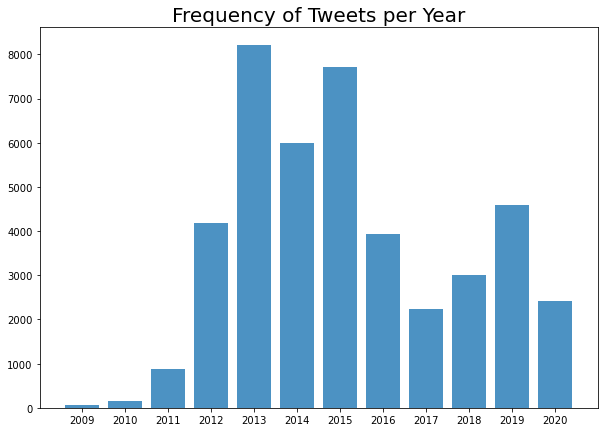

In [328]:
plt.figure(figsize= (10,7))
plt.bar(year_data.index, year_data, alpha=0.8)         
plt.title('Frequency of Tweets per Year',fontsize=20)   # 그래프 제목
plt.xticks(rotation=0)
plt.show()

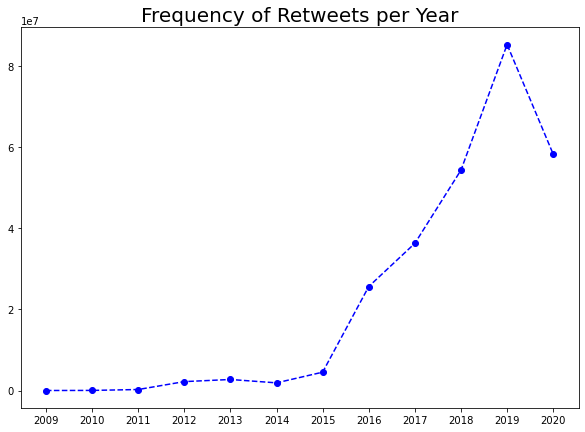

In [330]:
# 연도별 retweets 수 집계
retweets_yr = df1.groupby('year')['retweets'].sum()

# 그래프로 나타내기
plt.figure(figsize= (10,7))
plt.plot(retweets_yr.index, retweets_yr, color='b',
         linestyle='--', marker='o')           
plt.title('Frequency of Retweets per Year',fontsize=20)   
plt.xticks(rotation=0)
plt.show()

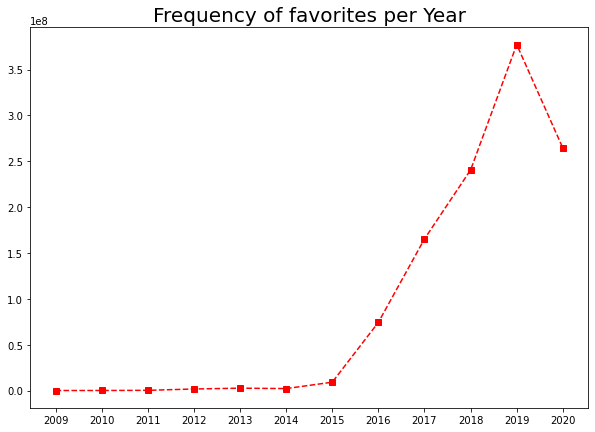

In [326]:
# 연도별 favorites 수 집계
favorites_yr = df1.groupby('year')['favorites'].sum()

# 그래프로 나타내기
plt.figure(figsize= (10,7))
plt.plot(favorites_yr.index, favorites_yr, color='r',
         linestyle='--', marker='s')           
plt.title('Frequency of favorites per Year',fontsize=20)   
plt.xticks(rotation=0)
plt.show()

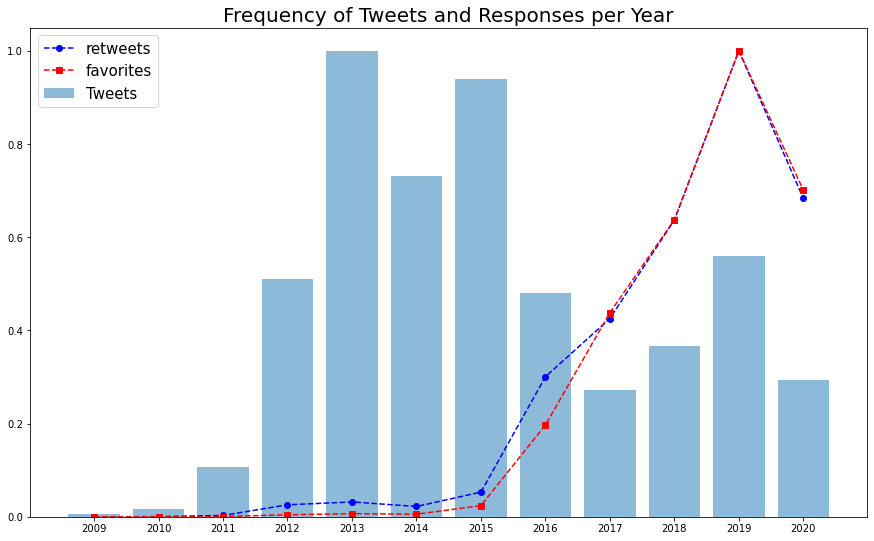

In [332]:
# 연도별 데이터 시각화

plt.figure(figsize= (15,9))
# 연도별 트윗 수 (%)
plt.bar(year_data.index, year_data/year_data.max(),alpha=0.5, label='Tweets')    
# 연도별 리트윗 수 (%)
plt.plot(retweets_yr.index, retweets_yr/retweets_yr.max(), color='b',
         linestyle='--', marker='o',label='retweets')              
# 연도별 좋아요 수 (%)
plt.plot(favorites_yr.index, favorites_yr/favorites_yr.max(), color='r',
         linestyle='--', marker='s',label='favorites')   

plt.title('Frequency of Tweets and Responses per Year',fontsize=20)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [104]:
# 3-2. 시간대 별 트윗 수와 트윗 반응(retweet, favorites) 

# date 칼럼에서 시간 추출
df1['time'] = df1['date'].str[-8:-6]
time_data = df1['time'].value_counts()    # 시간대별 집계
time_data

14    3284
15    3274
13    2791
08    2708
07    2591
09    2547
06    2346
10    2263
21    2207
12    2113
11    2113
20    2080
19    1875
16    1842
17    1740
18    1629
05    1436
22    1404
23     917
04     623
03     454
00     431
01     350
02     334
Name: time, dtype: int64

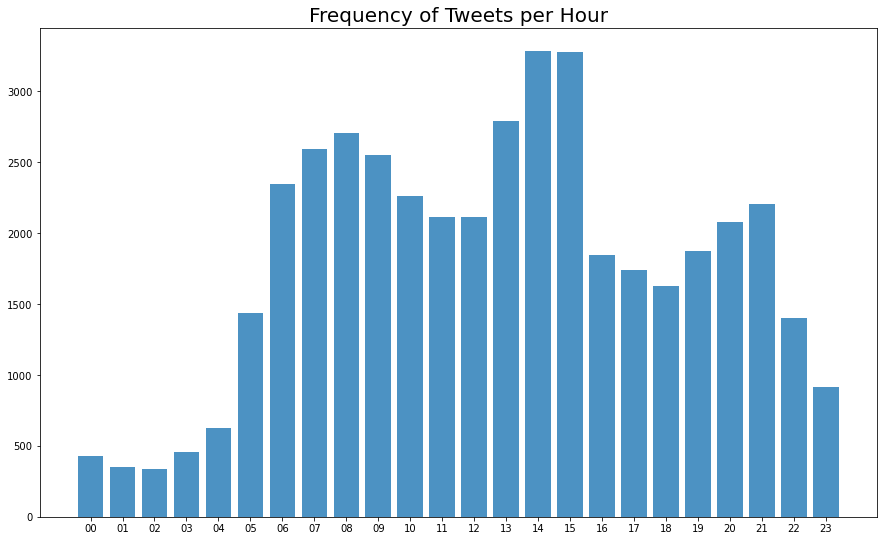

In [164]:
plt.figure(figsize= (15,9))
plt.bar(time_data.index, time_data, alpha=0.8)  # 바 그래프 출력
plt.title('Frequency of Tweets per Hour',fontsize=20)   
plt.xticks(rotation=0)
plt.show()

In [120]:
# 시간대별 retweets 수 집계

retweets_time = df1.groupby('time')['retweets'].sum()
retweets_time

time
00     1324059
01      437712
02      568397
03      585081
04     1660199
05    13421496
06    23162504
07    27467973
08    22107072
09    19316064
10    12071374
11    10470400
12    10311846
13    11707162
14    13095909
15    13890305
16    13262639
17    14958848
18    11662048
19    11617615
20    12464492
21    12247508
22     9279985
23     4499487
Name: retweets, dtype: int64

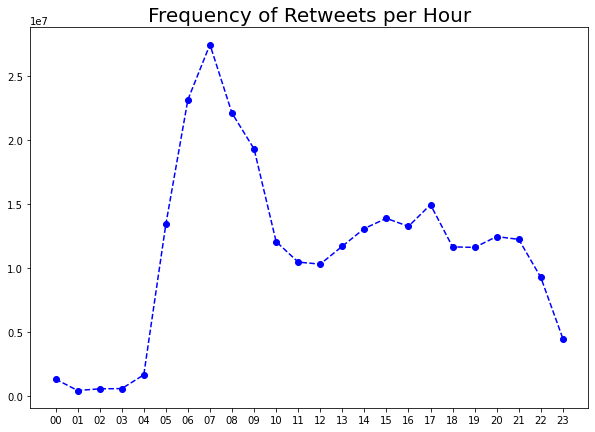

In [160]:
plt.figure(figsize= (10,7))
plt.plot(retweets_time.index, retweets_time, color='b',
         linestyle='--', marker='o')           
plt.title('Frequency of Retweets per Hour',fontsize=20)   
plt.xticks(rotation=0)
plt.show()

In [112]:
# 시간대별 favorites 수 집계

favorites_time = df1.groupby('time')['favorites'].sum()
favorites_time

time
00      5298696
01      1789804
02      2197605
03      2437008
04      6067142
05     56704920
06    102829698
07    121529818
08     94952005
09     83652803
10     49743832
11     43133145
12     42006326
13     45874357
14     53355658
15     55413491
16     55552243
17     65048232
18     47639409
19     47669807
20     49150508
21     49451296
22     37555268
23     18253779
Name: favorites, dtype: int64

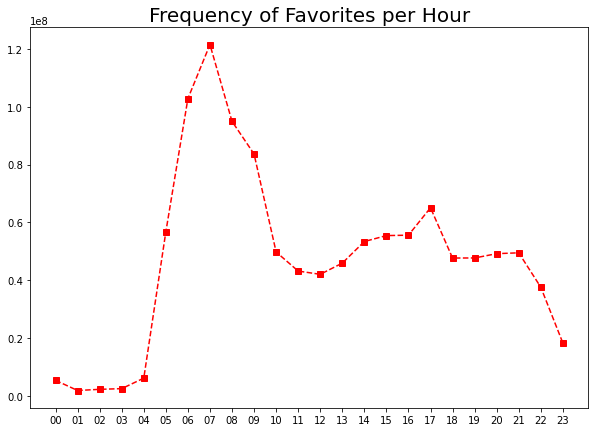

In [162]:
plt.figure(figsize= (10,7))
plt.plot(favorites_time.index, favorites_time, color='r',
         linestyle='--', marker='s')           
plt.title('Frequency of Favorites per Hour', fontsize=20)   
plt.xticks(rotation=0)
plt.show()

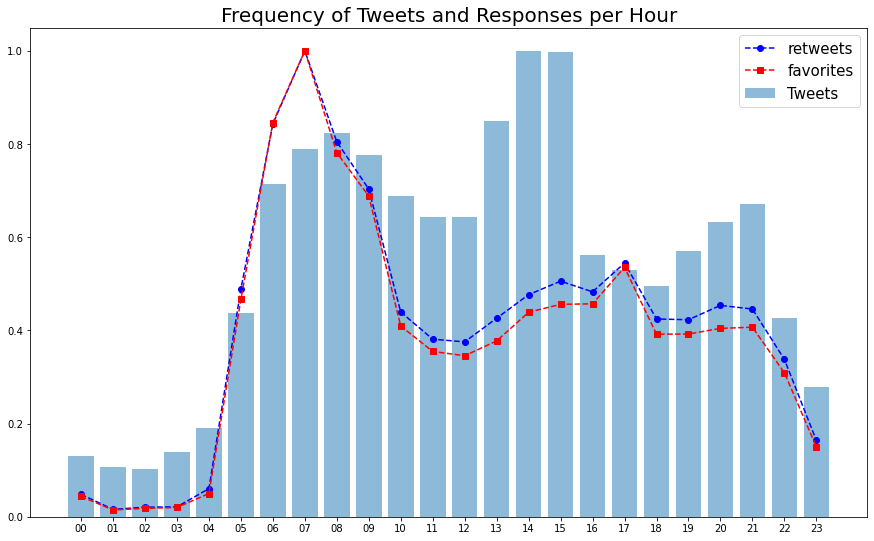

In [157]:
# 데이터 시각화

plt.figure(figsize= (15,9))
# 시간대별 트윗 수 (%)
plt.bar(time_data.index, time_data/time_data.max(), alpha=0.5, label='Tweets')  
# 시간대별 리트윗 수 (%)
plt.plot(retweets_time.index, retweets_time/retweets_time.max(), color='b',
         linestyle='--', marker='o',label='retweets')          
# 시간대별 좋아요 수 (%)
plt.plot(favorites_time.index, favorites_time/favorites_time.max(), color='r',
         linestyle='--', marker='s',label='favorites') 

plt.title('Frequency of Tweets and Responses per Hour',fontsize=20)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [169]:
# 3-3. retweets와 favorites 사이의 상관 관계

# 필요한 칼럼 추출
re_fav = df.loc[:,'retweets':'favorites']
re_fav.corr()

,retweets,favorites
retweets,1.000000,0.946925
favorites,0.946925,1.000000


<AxesSubplot:>

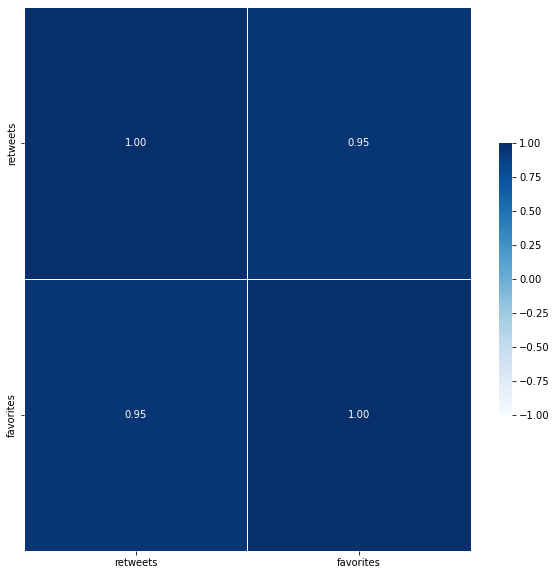

In [181]:
# 상관도 분석 (Correlation) 시각화
plt.figure(figsize=(10,10))

sns.heatmap(re_fav.corr(), annot=True, 
    fmt = '.2f', linewidths=.5, cmap='Blues',
    cbar_kws={"shrink": .5}, vmin = -1,vmax = 1 )

In [193]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


y=4.062230x+(785.318464)


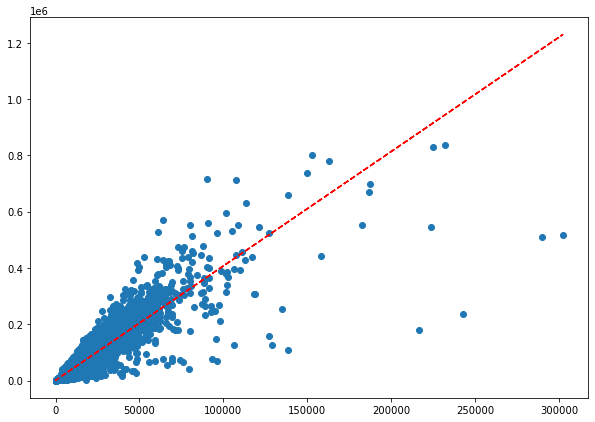

In [333]:
# 산점도 분석 (Scatter Plot) 시각화 + Trendline

x =  df1['retweets']
y = df1['favorites']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(10,7))
pylab.plot(x,y,'o') #산점도 'o'
pylab.plot(x,p(x),"r--")

print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

In [244]:
# 3-4. 가장 많이 사용된 hashtag 분석

df = pd.read_csv('realdonaldtrump.csv')
hashtag_df = df[['hashtags']]
hashtag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hashtags  5583 non-null   object
dtypes: object(1)
memory usage: 338.8+ KB


In [245]:
# 결측치 있는 행 제거

hashtag_df = hashtag_df.dropna(axis=0)
hashtag_df

,hashtags
188,#EvanForSI
235,#TrumpRoast
236,#TrumpRoast
237,#TrumpRoast
239,#TrumpRoast
...,...
43283,#IASENhttps
43286,#GA06https
43299,#NHSENhttps
43302,#MAGA


In [246]:
hashtag_df['hashtags'] = hashtag_df['hashtags'].str.replace('#','')
hashtag_df

,hashtags
188,EvanForSI
235,TrumpRoast
236,TrumpRoast
237,TrumpRoast
239,TrumpRoast
...,...
43283,IASENhttps
43286,GA06https
43299,NHSENhttps
43302,MAGA


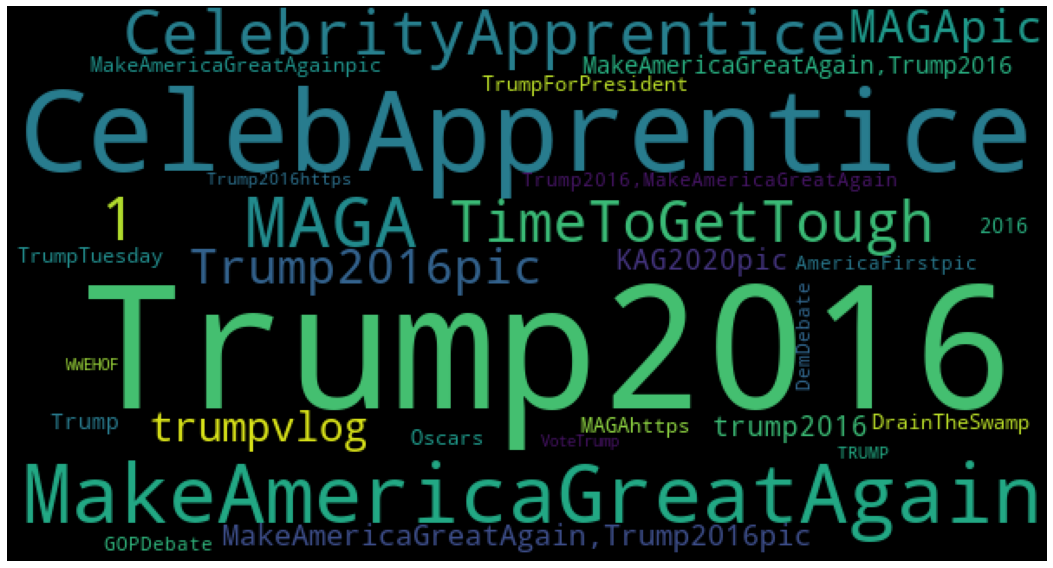

In [456]:
# 데이터 시각화

hashtag_data = ''
for data in hashtag_df['hashtags']:
    hashtag_data =  hashtag_data + ' ' + data

from collections import Counter
hashtag_data = Counter(hashtag_df['hashtags'])

# 불용어 처리 (중복, 의미없는 단어)
stopwords = set(STOPWORDS)
stopwords.add('twitter')
stopwords.add('pic')
stopwords.add('trump2016')
stopwords.add('CelebrityApprentice')
stopwords.add('MakeAmericaGreatAgainpic')
stopwords.add('MakeAmericaGreatAgain, Trump2016pic')
stopwords.add('MakeAmericaGreatAgain,Trump2016pic')
stopwords.add('MakeAmericaGreatAgain,Trump2016')
stopwords.add('2016')
stopwords.add('Trump2016,MakeAmericaGreatAgain')
stopwords.add('Trump2016https')
stopwords.add('Trump2016pic')

# WordCloud 생성 
wordcloud = WordCloud(stopwords = stopwords,max_words=30,max_font_size = 100,
                      width = 600, height = 320
                     ).generate_from_frequencies(hashtag_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

In [418]:
# 3-5. 가장 많은 response를 받은 트윗의 텍스트 분석

df = df[['content','retweets','favorites']]
df.info()   # 결측치 없음
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    43352 non-null  object
 1   retweets   43352 non-null  int64 
 2   favorites  43352 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1016.2+ KB


,content,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,510,917
1,Donald Trump will be appearing on The View tom...,34,267
2,Donald Trump reads Top Ten Financial Tips on L...,13,19
3,New Blog Post: Celebrity Apprentice Finale and...,11,26
4,"""My persona will never be that of a wallflower...",1375,1945
...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659
43349,pic.twitter.com/3lm1spbU8X,4959,19344
43350,pic.twitter.com/vpCE5MadUz,4627,17022


In [419]:
df['response'] = df['retweets'] + df['favorites']
df

,content,retweets,favorites,response
0,Be sure to tune in and watch Donald Trump on L...,510,917,1427
1,Donald Trump will be appearing on The View tom...,34,267,301
2,Donald Trump reads Top Ten Financial Tips on L...,13,19,32
3,New Blog Post: Celebrity Apprentice Finale and...,11,26,37
4,"""My persona will never be that of a wallflower...",1375,1945,3320
...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377,139779
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659,68469
43349,pic.twitter.com/3lm1spbU8X,4959,19344,24303
43350,pic.twitter.com/vpCE5MadUz,4627,17022,21649


In [420]:
top100_response = df.sort_values('response',ascending=False)[:100]
top100_response

,content,retweets,favorites,response
38615,A$AP Rocky released from prison and on his way...,232085,835575,1067660
43026,The United States of America will be designati...,224890,828937,1053827
43000,CHINA!,152666,799634,952300
40948,pic.twitter.com/VXeKiVzpTf,163102,780753,943855
40979,All is well! Missiles launched from Iran at tw...,149644,737415,887059
...,...,...,...,...
42972,This will be a Big Day for Social Media and FA...,67236,323565,390801
42631,OBAMAGATE makes Watergate look small time!,79953,310746,390699
42122,"Upon information and belief, Iran or its proxi...",64928,325234,390162
43001,The National Guard has arrived on the scene. T...,62215,327362,389577


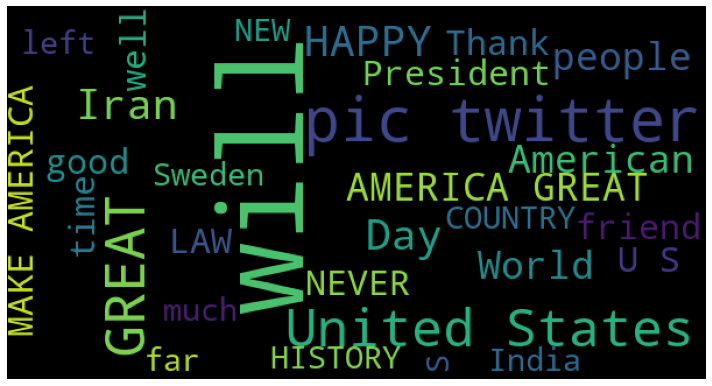

In [475]:
# 문자열 결합
string_data = ' '.join(top100_response['content'].values)

# WordCloud 생성
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_words=30,max_font_size = 100,
                      width = 600, height = 320
                     ).generate(string_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

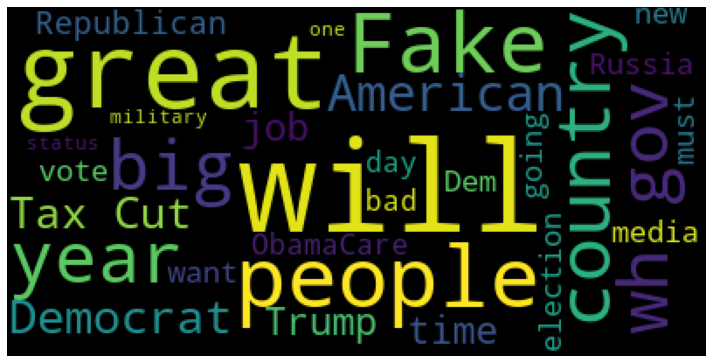

In [477]:
# 3-6. 연도별 트윗 내용 키워드 분석

# 2017년 트윗 분석
content_2017 = df1[df1['year'] == '2017']

# 불용어 처리 (중복)
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('much')
stopwords.add('thank')
stopwords.add('today')
stopwords.add('News')
stopwords.add('now')
stopwords.add('S')
stopwords.add('U')
stopwords.add('twitter')
stopwords.add('pic')
stopwords.add('many')

# WordCloud 시각화
string_data = ' '.join(content_2017['content'].values)
wordcloud = WordCloud(stopwords=stopwords,max_words=30).generate(string_data) 
                    
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

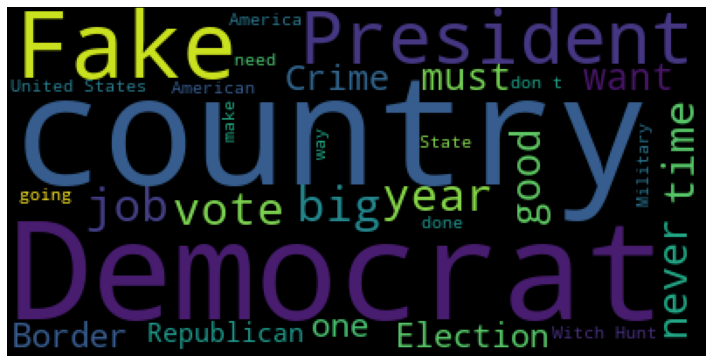

In [478]:
# 2018년 트윗 분석
content_2018 = df1[df1['year'] == '2018']

# 불용어 처리 (중복)
stopwords.add('people')
stopwords.add('will')
stopwords.add('day')
stopwords.add('Trump')
stopwords.add('great')


# WordCloud 시각화
string_data = ' '.join(content_2018['content'].values)
wordcloud = WordCloud(stopwords=stopwords,max_words=30).generate(string_data) 
                    
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

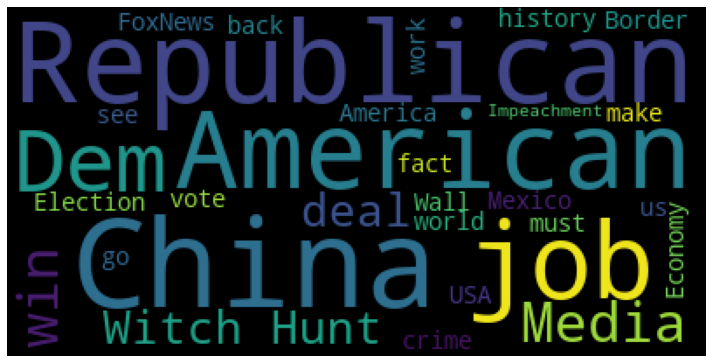

In [494]:
# 2019년 트윗 분석
content_2019 = df1[df1['year'] == '2019']

# 불용어 처리 (중복)
stopwords.add('country')
stopwords.add('President')
stopwords.add('done')
stopwords.add('status')
stopwords.add('said')
stopwords.add('dont')
stopwords.add('never')
stopwords.add('want')
stopwords.add('made')
stopwords.add('going')
stopwords.add('Democrat')
stopwords.add('Democrats')
stopwords.add('don')
stopwords.add('t')
stopwords.add('new')
stopwords.add('big')
stopwords.add('Fake')
stopwords.add('year')
stopwords.add('years')
stopwords.add('good')
stopwords.add('bad')
stopwords.add('time')
stopwords.add('one')
stopwords.add('even')
stopwords.add('one')
stopwords.add('Nothing')
stopwords.add('United')
stopwords.add('States')
stopwords.add('know')
stopwords.add('way')

# WordCloud 시각화
string_data = ' '.join(content_2019['content'].values)
wordcloud = WordCloud(stopwords=stopwords,max_words=30).generate(string_data) 
                    
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

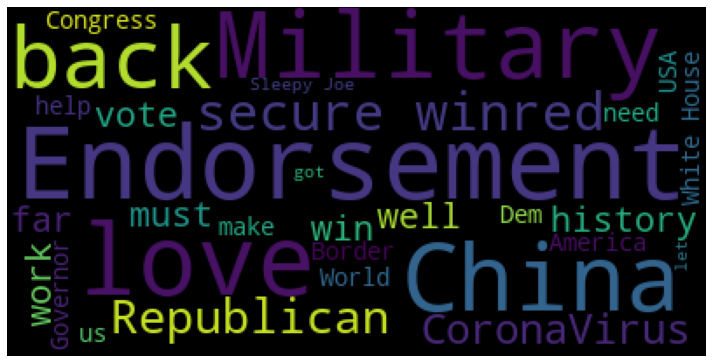

In [503]:
# 2020년 트윗 분석
content_2020 = df1[df1['year'] == '2020']

# 불용어 처리 (중복)
stopwords.add('State')
stopwords.add('strong')
stopwords.add('American')
stopwords.add('see')
stopwords.add('really')
stopwords.add('Total')
stopwords.add('Complete')
stopwords.add('FoxNews')
stopwords.add('job')
stopwords.add('realDonaldTrump')
stopwords.add('number')

# WordCloud 시각화
string_data = ' '.join(content_2020['content'].values)
wordcloud = WordCloud(stopwords=stopwords,max_words=30).generate(string_data) 
                    
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()